In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
author_data=pd.read_csv("author_data.csv")
author_data.index=author_data.id
author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
author_data.sample(20)

gender  age                 topic         sign grupo_edad  Freq
id                                                                      
4252919    male   15               Student      Scorpio          A     3
2992515  female   16             Education        Aries          A     8
2985647    male   15               Student        Virgo          A    49
3866619    male   17               Student       Gemini          A    26
3101477    male   16               Student       Cancer          A    11
3870559    male   15               Student        Virgo          A    24
3666762  female   23                indUnk      Scorpio          B     3
1044338  female   23               Student          Leo          B   215
3443175  female   25  Communications-Media       Gemini          B    13
3721928  female   24                indUnk        Aries          B    30
2622830  female   16                indUnk     Aquarius          A    34
4091350    male   26                indUnk       Pisces          B     5
3445560  female   15                indUnk       Taurus          A    28
3597131    male   24                indUnk       Gemini          B     6
3438321    male   23  Communications-Media        Libra          B     1
4112864    male   13               Student        Libra          A     8
3610040  female   16                indUnk  Sagittarius          A    14
4160773    male   16               Student       Gemini          A     9
4161732    male   26            Non-Profit     Aquarius          B     9
4298226  female   25             Education     Aquarius          B    53

In [6]:
words=pd.read_csv("frq_outh_complete_colnames.csv",header=None,index_col=None)

In [9]:
tfidf_data=pd.read_csv("frq_outh_complete_1.csv",header=None,index_col=None)
tfidf_data.index=author_data.index
tfidf_data.columns=list(words[0])
tfidf_data=tfidf_data.apply(pd.to_numeric,downcast='unsigned')
print(tfidf_data.shape)
tfidf_data.sample(20)

(18981, 500)


though  school  always  ever  better  myself  let  year  another  \
id                                                                          
3682500       0       4       2     4       1       3    0     7        2   
2481917       0       1       1     0       0       0    0     0        0   
3884133       0       2       2     0       1       0    0     1        0   
4152489       0       2       1     1       0       0    0     0        0   
3336074       4       1       4     3       3       1    1     1        1   
3916226       1       0       0     5       3       0    0     1        2   
3423558       0       0       0     0       1       0    0     2        1   
1810524       3       3       8     8       5       9    8     4        8   
3881859       1       1       2     1       1       2    0     0        1   
3384162       3       0       0     4       1       3    6     1        1   
3946611       0       1       4     0       1       7    4     1        0   
4206291       0       1       3     0       0       0    1     0        1   
3941008       2       8      13    17      10      20   11    14       16   
4032511       0       0       1     1       2       2    2     1        6   
4007693       0       0       4     2       4       2    4     0        0   
3833729       0       0       0     5       0       0    0     0        1   
1636139       3       2       5     0       1       1    2     1        1   
4052951       2       0       2     1       2       2    2     3        3   
2916797       0       0       2     0       1       0    3     1        0   
1178991       2       7       1     0       3       2    0     2        0   

         many  ...  president  english  cute  longer  internet  dead  rock  \
id             ...                                                           
3682500     1  ...          0        0     0       0         6     1     0   
2481917     1  ...          0        0     0       1         2     0     0   
3884133     0  ...          0        4     0       0         0     0     0   
4152489     1  ...          0        0     0       0         0     0     1   
3336074     2  ...          0        0     2       0         4     1     0   
3916226     0  ...          0        2     0       0         0     0     0   
3423558     0  ...          0        0     0       0         1     1     0   
1810524     1  ...          0        0     0       1         0     2     0   
3881859     1  ...          0        2     2       0         0     0     0   
3384162     2  ...          0        0     0       2         0     1     0   
3946611     0  ...          0        0     0       0         0     0     0   
4206291     0  ...          0        0     2       0         0     0     0   
3941008     5  ...          1        1     2       2         4     2     1   
4032511     0  ...          0        0     0       0         0     0     0   
4007693     2  ...          0        0     0       0         0     0     0   
3833729     0  ...          0        1     0       0         0     1     0   
1636139     1  ...          0        0     0       1         0     1     0   
4052951     2  ...          0        0     2       0         0     0     0   
2916797     0  ...          0        0     0       0         0     0     0   
1178991     0  ...          0        0     0       0         0     0     0   

         special  road  forget  
id                              
3682500        1     0       0  
2481917        0     0       0  
3884133        0     0       0  
4152489        0     0       0  
3336074        0     0       2  
3916226        0     0       0  
3423558        0     0       0  
1810524        0     0       3  
3881859        0     0       0  
3384162        3     0       0  
3946611        0     0       0  
4206291        0     0       0  
3941008        1     0       2  
4032511        0     0       0  
4007693        1     0       1  
3833729        1     0       0  
163

# Clustering semisupervisado
Se reduce dimensionalmente una muestra, se obtienen los cluster y se proyecta estos puntos mediante KNN

In [ ]:
# tfidf_data_sample=tfidf_data.sample(frac=.3)
# tfidf_data_sample.shape

In [ ]:
# print(tfidf_data.shape)
# print(tfidf_data_sample.shape)

## Reducción dimensional

### PCA

In [10]:
pca=PCA()
pca.fit(tfidf_data)
pca_coords=pca.transform(tfidf_data)

500

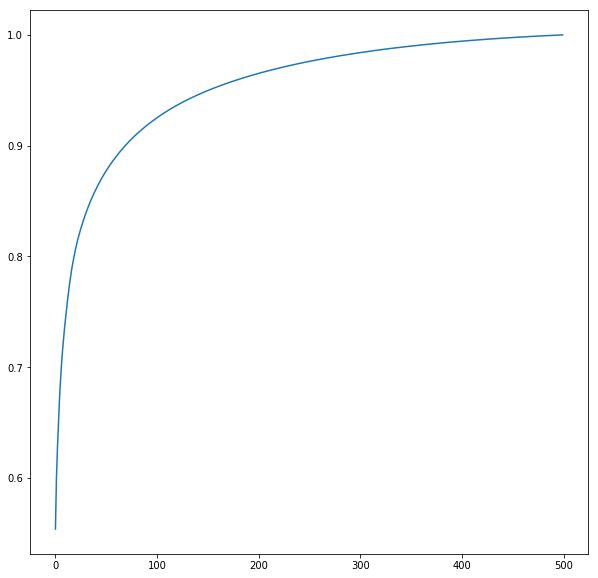

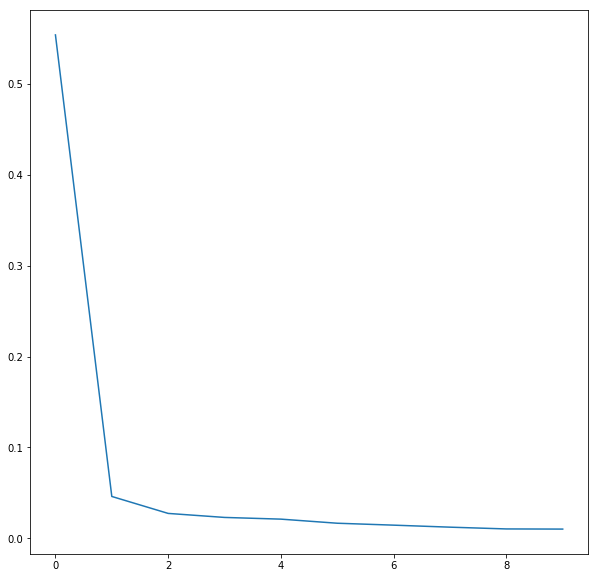

In [11]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum())
len(pca.explained_variance_ratio_)

plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_[:10])
len(pca.explained_variance_ratio_)

In [12]:
comps_pca_var=pd.DataFrame({"var_comp":pca.explained_variance_ratio_,
              "cumsum":pca.explained_variance_ratio_.cumsum()})

In [13]:
comps_pca_var[comps_pca_var["cumsum"]<=.82]

var_comp    cumsum
0   0.553782  0.553782
1   0.046124  0.599906
2   0.027477  0.627383
3   0.023060  0.650443
4   0.021183  0.671626
5   0.016680  0.688306
6   0.014566  0.702872
7   0.012354  0.715226
8   0.010404  0.725630
9   0.010234  0.735865
10  0.008726  0.744590
11  0.008572  0.753162
12  0.008201  0.761363
13  0.007626  0.768989
14  0.006913  0.775902
15  0.006485  0.782387
16  0.006097  0.788484
17  0.005162  0.793646
18  0.004902  0.798547
19  0.004725  0.803273
20  0.004336  0.807609
21  0.003936  0.811545
22  0.003798  0.815343
23  0.003427  0.818770

In [14]:
auth_ward_PCA=hierarchy.linkage(pca_coords[:,:19], 'ward')#tfidf_data

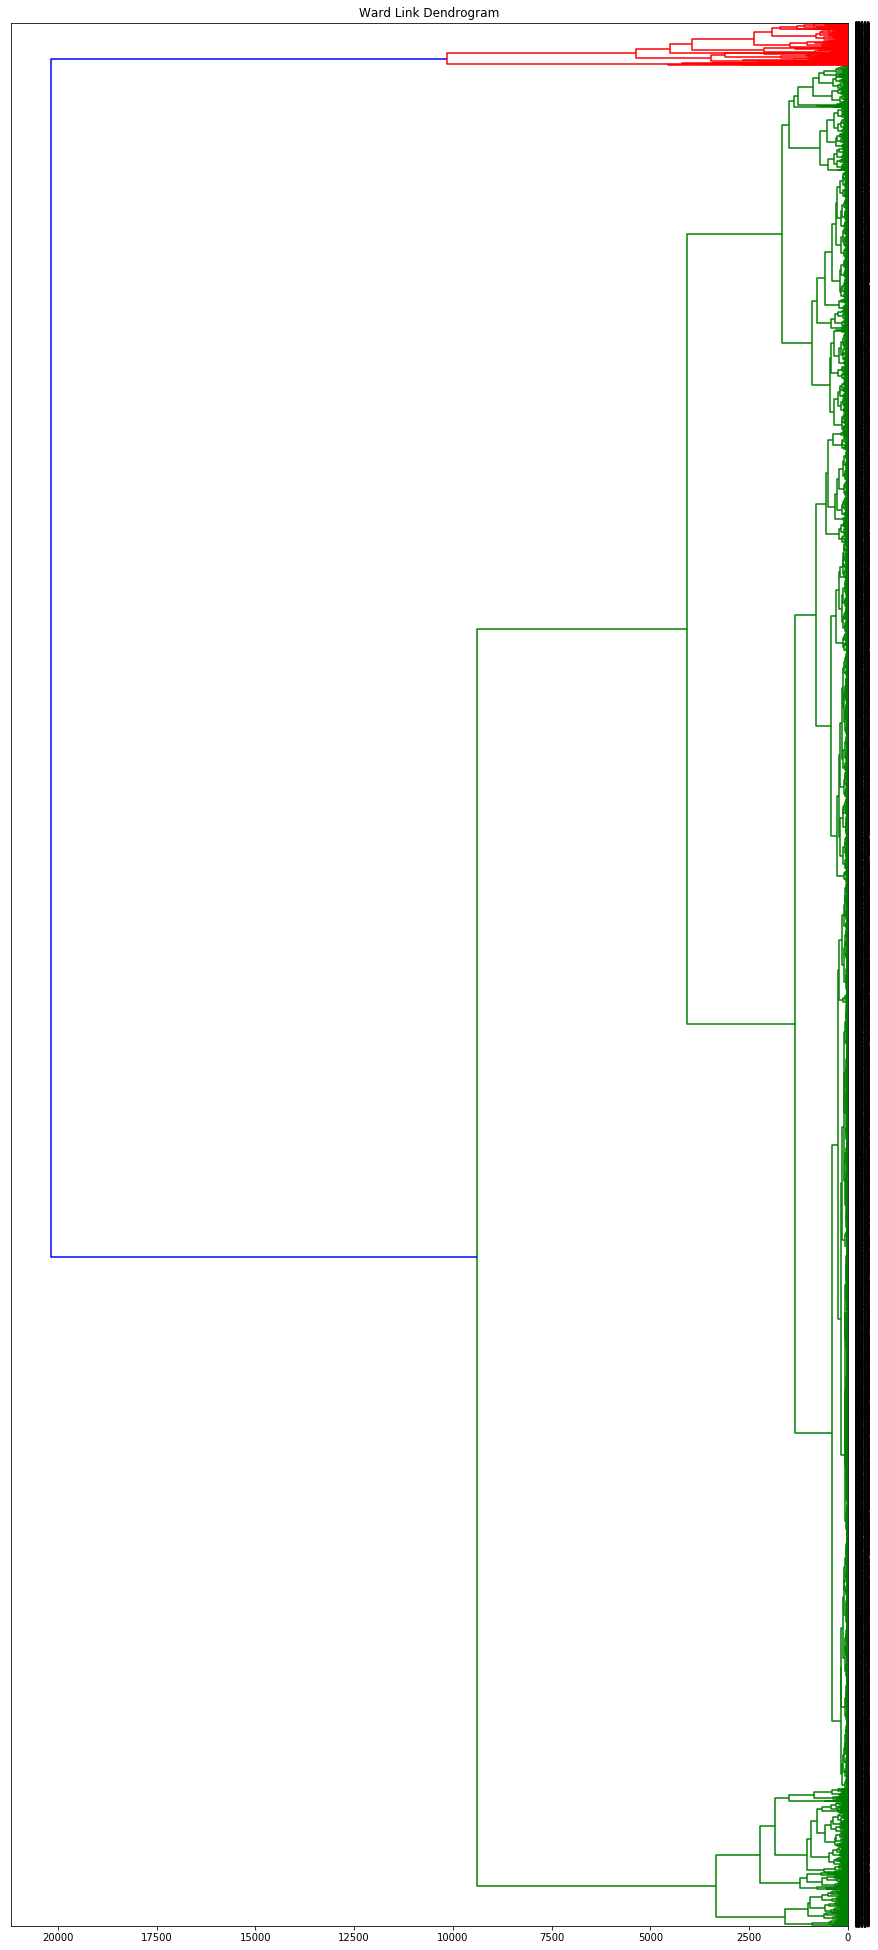

In [15]:
plt.figure(figsize=(15,35))
dn_tf_PCA = hierarchy.dendrogram(auth_ward_PCA,orientation="left")
plt.title('Ward Link Dendrogram')
plt.show()

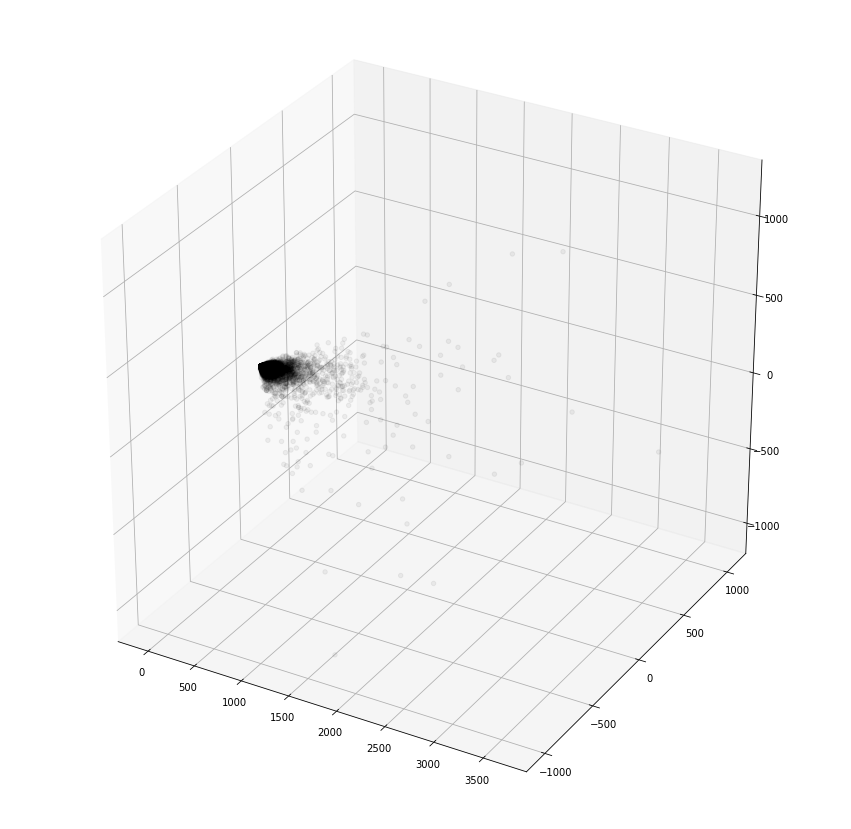

In [16]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_coords[:,0],
           ys=pca_coords[:,1],
           zs=pca_coords[:,2],
           c="black", 
           alpha=.05,
           cmap=plt.cm.Set1)

### Spectral Embedding

In [17]:
# 3d Embedding for visualization
spect_emb_3=manifold.SpectralEmbedding(n_components=19, n_jobs=-1).fit_transform(tfidf_data)#author_data_norm)#

In [18]:
# spect_emb_3=spect_emb_3*1000

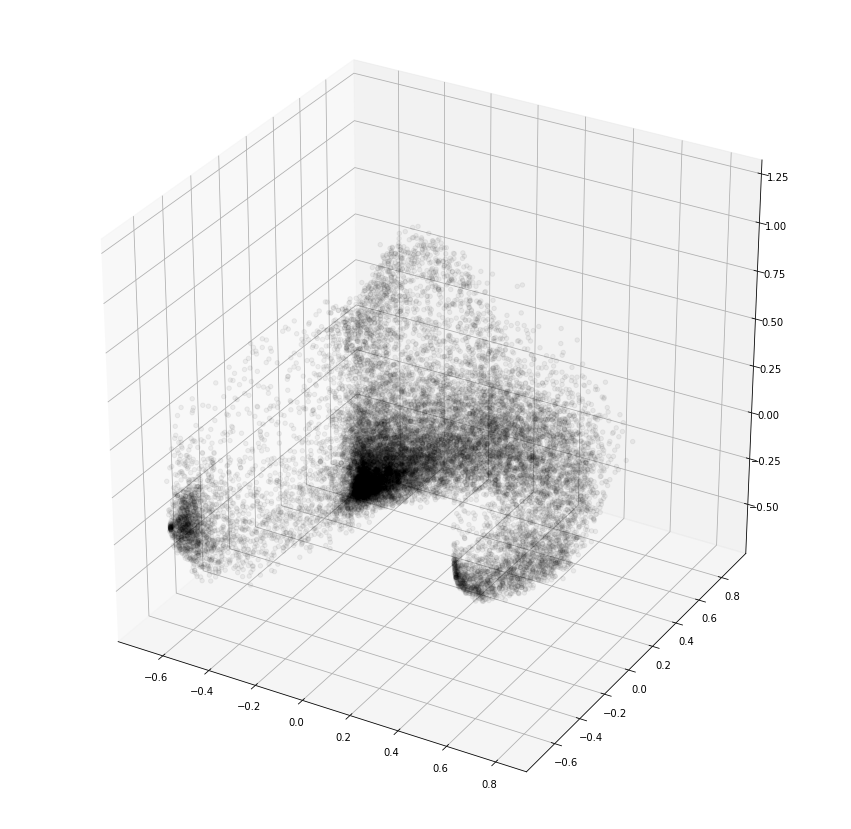

In [19]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c="black", 
           alpha=.05,
           cmap=plt.cm.Set1)


In [20]:
auth_ward_spect=hierarchy.linkage(spect_emb_3, 'ward')#tfidf_data

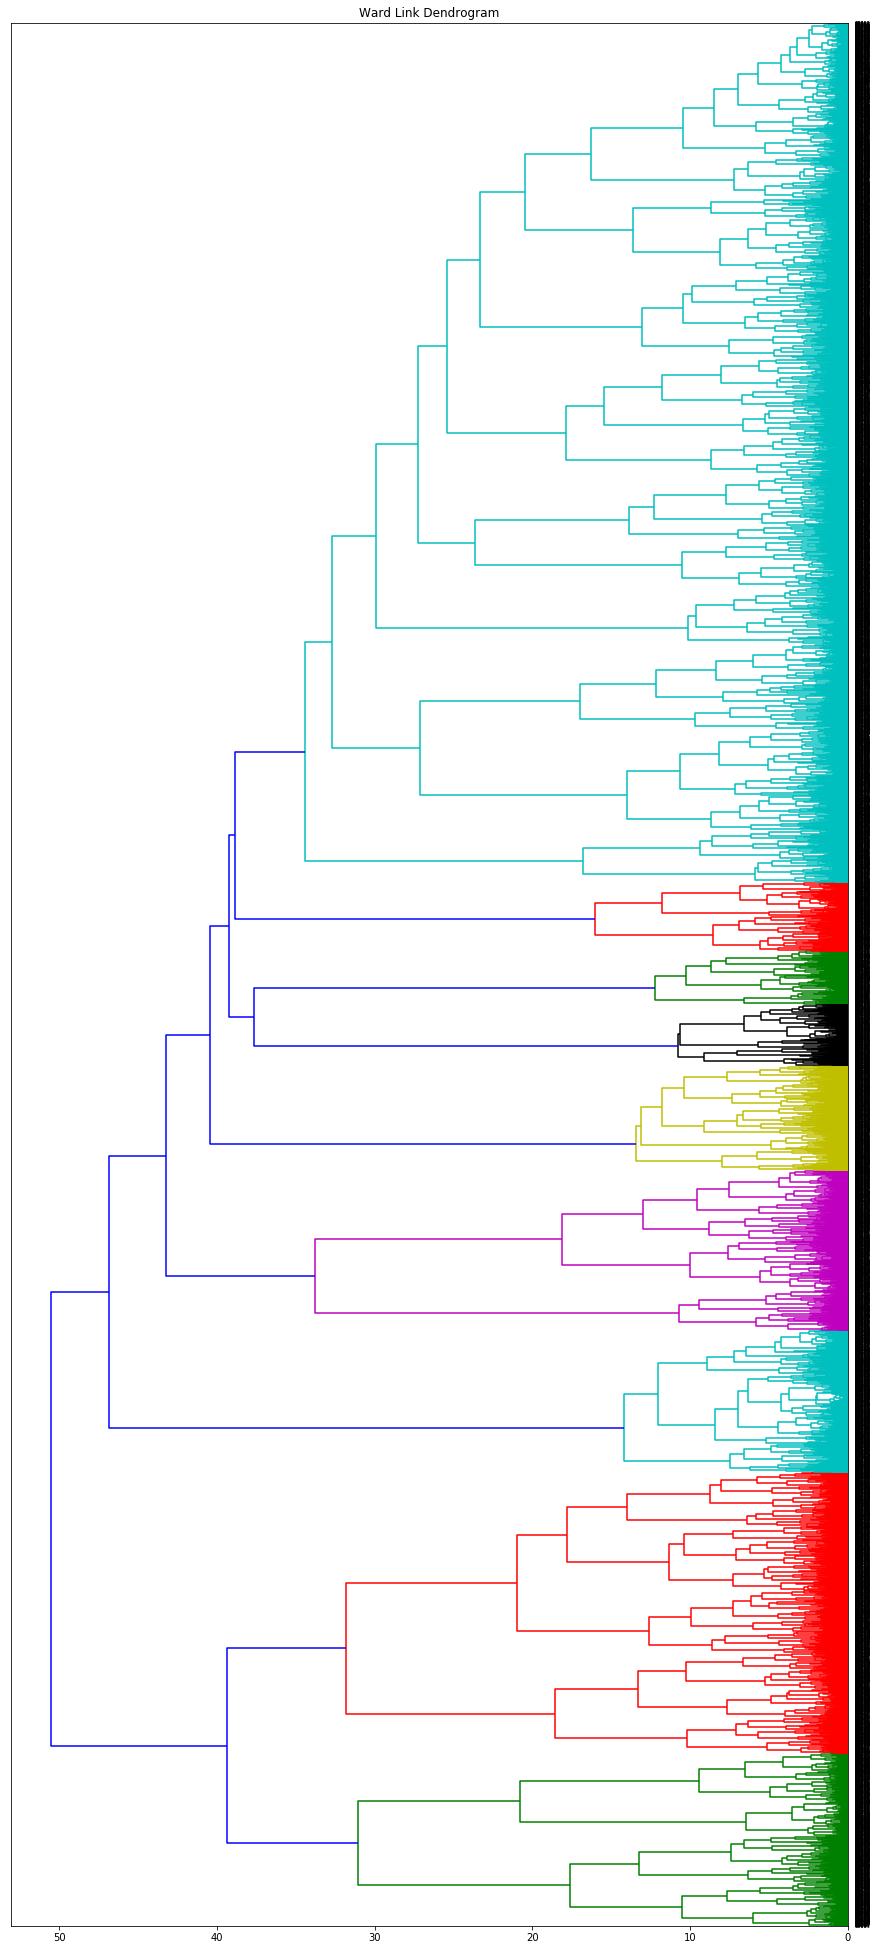

In [21]:
plt.figure(figsize=(15,35))
dn_tf_spect = hierarchy.dendrogram(auth_ward_spect,orientation="left")
plt.title('Ward Link Dendrogram')
plt.show()

#### Conclusiones:

Se define trabajar spectral embedding con 19 dimensiones (tomadas de la varianza explicada del PCA al 80%) y se grafica en las 3 primeras dimensiones del spectral embedding.

# Clustering

In [106]:
connectivity = kneighbors_graph(spect_emb_3, n_neighbors=20, include_self=False, n_jobs=-1)
ward = AgglomerativeClustering(n_clusters=17, connectivity=connectivity,
                               linkage='ward').fit(spect_emb_3)
label = ward.labels_

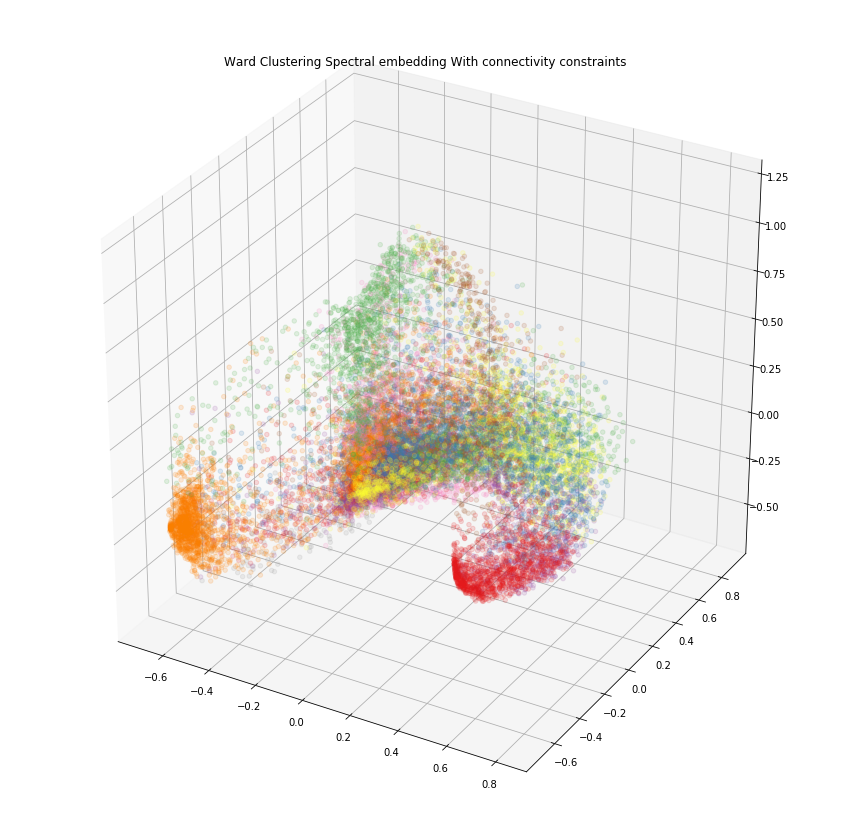

In [107]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for lb in np.unique(label):
    ax.scatter(spect_emb_3[label == lb, 0], 
               spect_emb_3[label == lb, 1], 
               spect_emb_3[label == lb, 2],
               color=plt.cm.Set1(float(lb) / np.max(label + 1)),
               s=20, edgecolor=None, alpha=.15)
plt.title('Ward Clustering Spectral embedding With connectivity constraints')
plt.show()

In [108]:
pd.crosstab(index=label, columns="count")

col_0  count
row_0       
0       3734
1       1237
2       1493
3        838
4       1742
5       1093
6        661
7        682
8       1536
9        866
10      1037
11       633
12       383
13       975
14       601
15       523
16       947

Text(0.5, 1.0, '2d spectral coordinates from 3d spectral hierarchical (ward) clustering')

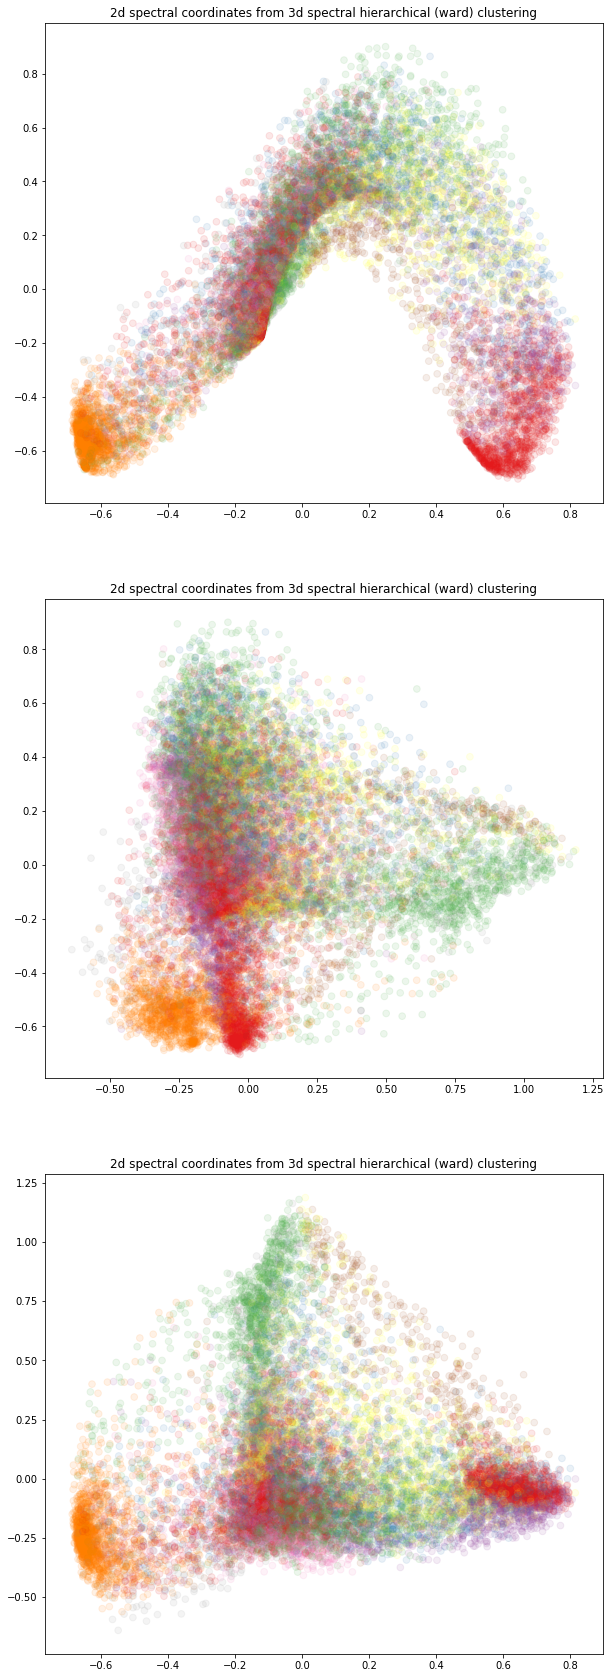

In [109]:
plt.figure(figsize=(10,30))
par_alf=0.1
plt.subplot(311)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,1], alpha=par_alf,s=45, c=label, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(312)
plt.scatter(spect_emb_3[:,2],spect_emb_3[:,1], alpha=par_alf,s=45, c=label, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(313)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,2], alpha=par_alf,s=45, c=label, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

## DBScan clustering

In [110]:
# dist_mat_3d=pairwise_distances(spect_emb_3)

In [111]:
# dist_vec=dist_mat_3d.flatten()

In [112]:
# plt.figure(figsize=(16,9))
# # plt.hist(n_grams_tfidf_dist_mat.flatten())
# sns.distplot(dist_vec)
# # sns.kdeplot()

In [113]:
# freq_dists=pd.crosstab(index=np.round_(dist_vec[dist_vec<.6],3), columns="count")

In [114]:
# print(freq_dists.iloc[400:500,:])#.iloc[:50,:])
# freq_dists.iloc[400:500,:].plot(kind="bar",figsize=(16,9))##.iloc[200:500,:]
# #0.168

In [115]:
# max_eps=.475
# min_eps=.45
# eps_par=min_eps+((max_eps-min_eps)/2)
# print(eps_par)

In [116]:
# db_scan = DBSCAN(eps=eps_par, min_samples=70).fit(spect_emb_3)#spect_emb_tfidf)
# spect_db_labels = db_scan.labels_

In [117]:
# pd.crosstab(index=spect_db_labels, columns="count")

In [118]:
# plt.figure(figsize=(10,30))
# par_alf=.01#(spect_db_labels>-.5)*.1#0.1
# plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

# plt.subplot(311)
# plt.scatter(spect_emb_3[spect_db_labels==-1,0],spect_emb_3[spect_db_labels==-1,1], alpha=0.05,s=45, c="gray", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==0,0],spect_emb_3[spect_db_labels==0,1], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==1,0],spect_emb_3[spect_db_labels==1,1], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==2,0],spect_emb_3[spect_db_labels==2,1], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==3,0],spect_emb_3[spect_db_labels==3,1], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==4,0],spect_emb_3[spect_db_labels==4,1], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)

# plt.subplot(312)
# plt.scatter(spect_emb_3[spect_db_labels==-1,2],spect_emb_3[spect_db_labels==-1,1], alpha=0.05,s=45, c="gray", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==0,2],spect_emb_3[spect_db_labels==0,1], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==1,2],spect_emb_3[spect_db_labels==1,1], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==2,2],spect_emb_3[spect_db_labels==2,1], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==3,2],spect_emb_3[spect_db_labels==3,1], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==4,2],spect_emb_3[spect_db_labels==4,1], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)

# plt.subplot(313)
# plt.scatter(spect_emb_3[spect_db_labels==-1,0],spect_emb_3[spect_db_labels==-1,2], alpha=0.05,s=45, c="gray", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==0,0],spect_emb_3[spect_db_labels==0,2], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==1,0],spect_emb_3[spect_db_labels==1,2], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==2,0],spect_emb_3[spect_db_labels==2,2], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==3,0],spect_emb_3[spect_db_labels==3,2], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
# # plt.scatter(spect_emb_3[spect_db_labels==4,0],spect_emb_3[spect_db_labels==4,2], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)


# Animate - Export 3d clusters

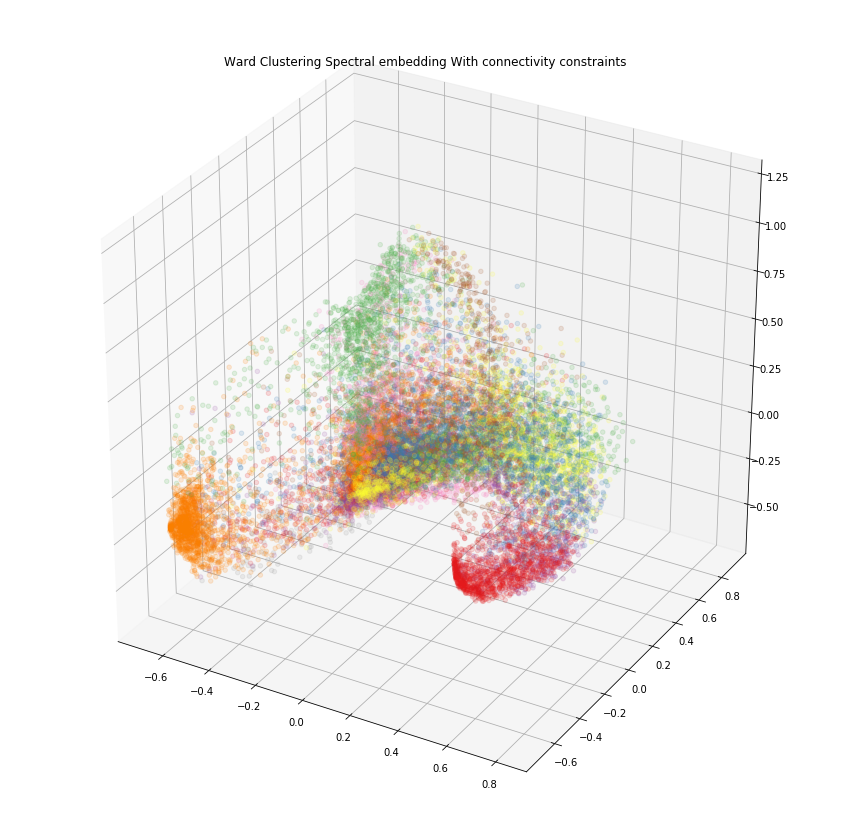

Making animation
Saving Movie File


MovieWriter imagemagick unavailable. Trying to use pillow instead.


Saving animated GIF File


In [138]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for lb in np.unique(label):
    ax.scatter(spect_emb_3[label == lb, 0], 
               spect_emb_3[label == lb, 1], 
               spect_emb_3[label == lb, 2],
               color=plt.cm.Set1(float(lb) / np.max(label + 1)),
               s=20, edgecolor=None, alpha=.15)
plt.title('Ward Clustering Spectral embedding With connectivity constraints')
plt.show()
# plt.axis('off') # remove axes for visual appeal

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
print("Saving Movie File")
rot_animation.save('cluster_anim_4.mp4', writer=writer)
print("Saving animated GIF File")
rot_animation.save('whljgr_clustering_4.gif', dpi=80, writer='imagemagick')

In [120]:
author_data["cluster"]=label
author_data["embd_x_coord"]=spect_emb_3[:,0]
author_data["embd_y_coord"]=spect_emb_3[:,1]
author_data["embd_z_coord"]=spect_emb_3[:,2]

In [121]:
author_data.head(30)

gender  age                 topic         sign grupo_edad  Freq  \
id                                                                         
2059027    male   15               Student          Leo          A     4   
3581210    male   33     InvestmentBanking     Aquarius          C    70   
3539003  female   14                indUnk        Aries          A    21   
4172416  female   25                indUnk    Capricorn          B     2   
3668238  female   17               Student       Gemini          A    10   
4030905  female   17               Student        Aries          A    25   
4198080  female   23                indUnk     Aquarius          B     1   
3705830    male   25            Non-Profit       Cancer          B    46   
3649763  female   33               Banking     Aquarius          C    13   
3389918  female   37                indUnk     Aquarius          C    19   
4304458  female   25                indUnk  Sagittarius          B     3   
3429420    male   15               Student     Aquarius          A    34   
3389671    male   26                indUnk          Leo          B    35   
649790   female   24                indUnk      Scorpio          B   191   
3022585  female   27             Education     Aquarius          B    85   
3808902  female   45                indUnk  Sagittarius          C    14   
3176655    male   24           Engineering        Libra          B   119   
3667495    male   15               Science        Libra          A    29   
3486574  female   15               Student       Gemini          A     5   
4275555  female   34                indUnk      Scorpio          C     6   
1240631    male   41  Communications-Media        Libra          C    14   
3711014    male   24      BusinessServices       Cancer          B    19   
3168577    male   23                indUnk  Sagittarius          B    49   
1550279    male   17               Student  Sagittarius          A    32   
1916038  female   14                indUnk       Cancer          A     3   
3568056    male   17     Sports-Recreation    Capricorn          A    75   
3359005    male   14               Student      Scorpio          A    46   
2012853  female   23                indUnk        Libra          B    17   
4291530  female   23                indUnk        Virgo          B     2   
4313749  female   25                indUnk       Taurus          B     6   

         cluster  embd_x_coord  embd_y_coord  embd_z_coord  
id                                                          
2059027       13      0.305794      0.311182     -0.149723  
3581210       11     -0.322922     -0.220078     -0.454121  
3539003        7      0.648872      0.001035     -0.058047  
4172416        4      0.051147      0.683955     -0.010875  
3668238        0     -0.125628     -0.045184     -0.029322  
4030905        9     -0.091530      0.007780      0.144140  
4198080        8     -0.628097     -0.631151     -0.307006  
3705830        0     -0.110172     -0.033808      0.078974  
3649763        1      0.551785     -0.663122     -0.007203  
3389918        2     -0.396746     -0.351605     -0.014201  
4304458       15     -0.131677     -0.085341      0.431456  
3429420       14      0.187334      0.372157     -0.281280  
3389671       13     -0.086089      0.036341     -0.140438  
649790         8     -0.647043     -0.490903     -0.365952  
3022585        7      0.496263     -0.098314     -0.183679  
3808902       16     -0.405316     -0.129785     -0.288494  
3176655        3      0.656336     -0.084050     -0.063206  
3667495       15     -0.027726      0.177875      0.265588  
3486574       14     -0.116036     -0.107670     -0.107909  
4275555        0     -0.077247      0.038576      0.056290  
1240631        4     -0.069714      0.124427     -0.098535  
3711014       13      0.186294      0.633077      0.043082  
3168577        4      0.270809      0.797986      0.140818  
1550279        9      0.078248      0.310198      0

In [122]:
author_data.to_csv("author_data_clusters_4.csv")

# Explore Clusters

In [123]:
pd.crosstab(index=author_data.topic, columns=author_data.cluster)

cluster                    0    1    2    3    4    5    6    7    8    9   \
topic                                                                        
Accounting                 18   10    7    4    6    8    2    5    8    8   
Advertising                23   10   10    6   19   10    3    2   13   10   
Agriculture                13    2    3    0    4    0    1    2    4    0   
Architecture               15    7    5    3    6    3    3    1    9    1   
Arts                      144   36   72   33   70   41   26   28   54   29   
Automotive                 12    2    4    4    2    6    1    3    8    2   
Banking                    17    8    3    5   13    7    8    4   13    4   
Biotech                     9    9    4    3    5    1    3    2    4    1   
BusinessServices           31   14   18    1    9   12    4    5   10    5   
Chemicals                  13    1    6    2    7    4    5    2    2    2   
Communications-Media      111   23   36   20   42   17   15   27   38   16   
Construction               14    2    3    2    7    1    3    1    4    3   
Consulting                 44   13   16   11   11   12    6    6   12    3   
Education                 190   61   78   43   82   44   29   45   85   48   
Engineering                53   22   28   16   26   15   14   12   28   15   
Environment                 4    1    3    0    4    0    3    0    3    2   
Fashion                    20    5   11    3    6    4    5    5    8    3   
Government                 40   14   17   10   25   17    4   13   20   11   
HumanResources             22    5    8    2    6    9    2    3    9    3   
Internet                   72   26   36   15   36   24   15   11   31   20   
InvestmentBanking           5    1    1    2    3    1    3    2    4    2   
Law                        42    9   11    7   21   12    4    6   11   15   
LawEnforcement-Security    15    3    4    2    1    4    1    1    6    3   
Manufacturing              17    9    7    4    7    4    3    2   11    2   
Maritime                    3    0    2    0    2    1    0    0    5    0   
Marketing                  36    7   13    8   20   10    7    5   11    8   
Military                   22    7   12    4    5    6    4    2   11    4   
Museums-Libraries           9    4    4    2    5    6    1    2    1    5   
Non-Profit                 86   23   27   14   39   19   14   16   30   14   
Publishing                 27    9   19    4   11   11    2    8   11    6   
RealEstate                 10    5    6    1    2    3    2    4    4    2   
Religion                   30    3   12    6   14    8    5    8    7    2   
Science                    27    9   13   11   17   16    2    3   11    8   
Sports-Recreation          11    8    7    3   10    7    6    4    5    5   
Student                   992  380  366  224  444  298  165  172  428  235   
Technology                182   58   79   45   92   48   30   46   72   41   
Telecommunications         26    7    6    4   14    6    7    2    9    8   
Tourism                    16   13    8    4    7    3    2    2    5    6   
Transportation             22    4    8    0    6    4    2    6    4    0   
indUnk                   1291  407  520  310  636  391  249  214  527  314   

cluster                   10   11   12   13   14   15   16  
topic                                                       
Accounting                 5    1    3    7    2    7    2  
Advertising                7    2    2    8    6    6    4  
Agriculture                2    1    0    3    0    0    1  
Architecture               1    1    1    1    0    5    6  
Arts                      34   27    8   44   23   13   27  
Automotive                 1    1    1    2    2    1    1  
Banking                    6    4    0    7    3    0    5  
Biotech                    2    0    1    3    3    1    3  
BusinessServices          13    7    3    9    6    5    9  
Chemicals                  5    2    1    3    4    

In [124]:
pd.crosstab(index=author_data.grupo_edad, columns=author_data.cluster)

cluster       0    1    2    3    4    5    6    7    8    9    10   11   12  \
grupo_edad                                                                     
A           1603  573  623  346  735  466  280  274  685  379  427  246  169   
B           1537  472  625  359  759  447  285  304  620  359  455  291  153   
C            594  192  245  133  248  180   96  104  231  128  155   96   61   

cluster      13   14   15   16  
grupo_edad                      
A           402  260  222  411  
B           413  260  214  382  
C           160   81   87  154

In [125]:
pd.crosstab(index=[author_data.topic,author_data.grupo_edad], columns=author_data.cluster)

cluster                         0    1    2    3    4    5    6    7    8   \
topic              grupo_edad                                                
Accounting         A             1    1    1    0    0    1    0    0    1   
                   B            14    6    4    3    5    5    2    3    5   
                   C             3    3    2    1    1    2    0    2    2   
Advertising        A             0    0    1    1    1    0    0    0    1   
                   B            16    7    6    3   14    5    1    2   10   
                   C             7    3    3    2    4    5    2    0    2   
Agriculture        A             3    1    2    0    2    0    1    2    2   
                   B             7    1    1    0    1    0    0    0    1   
                   C             3    0    0    0    1    0    0    0    1   
Architecture       A             1    2    1    1    0    0    0    0    3   
                   B            11    4    3    1    5    1    3    1    5   
                   C             3    1    1    1    1    2    0    0    1   
Arts               A            43    9   21   11   26    9    5    9   12   
                   B            69   17   34   15   27   23   15   14   35   
                   C            32   10   17    7   17    9    6    5    7   
Automotive         A             3    0    2    1    0    1    0    1    2   
                   B             7    1    1    1    2    5    0    1    6   
                   C             2    1    1    2    0    0    1    1    0   
Banking            A             0    0    0    1    0    0    0    0    0   
                   B            15    4    2    3   12    5    8    3    9   
                   C             2    4    1    1    1    2    0    1    4   
Biotech            A             0    6    1    2    1    1    1    0    3   
                   B             7    2    3    0    3    0    1    2    1   
                   C             2    1    0    1    1    0    1    0    0   
BusinessServices   A             6    3    7    0    0    0    0    0    0   
                   B            17    7    7    1    6   10    3    4    8   
                   C             8    4    4    0    3    2    1    1    2   
Chemicals          A             6    1    2    0    2    1    4    0    1   
                   B             7    0    3    2    4    3    1    1    1   
                   C             0    0    1    0    1    0    0    1    0   
...                            ...  ...  ...  ...  ...  ...  ...  ...  ...   
RealEstate         A             1    2    2    0    1    0    0    0    1   
                   B             9    1    1    1    0    3    1    3    2   
                   C             0    2    3    0    1    0    1    1    1   
Religion           A             5    1    3    0    2    2    1    1    0   
                   B            19    1    5    5    7    2    4    4    4   
                   C             6    1    4    1    5    4    0    3    3   
Science            A             6    2    1    2    1    2    0    0    3   
                   B            17    7   10    7   16   11    2    3    6   
                   C             4    0    2    2    0    3    0    0    2   
Sports-Recreation  A             6    4    5    1    3    5    3    2    2   
                   B             4    3    2    2    4    1    1    2    2   
                   C             1    1    0    0    3    1    2    0    1   
Student            A           811  319  307  181  353  253  137  136  354   
                   B           168   57   52   39   89   40   27   35   73   
                   C            13    4    7    4    2    5    1    1    1   
Technology         A            17    3    7    5    8    5    3    1    2   
                   B           111   34   53   27   57   34   19   30   51   
                   C            54   21   19   13   27    9    8   15   19   
Telecommunications A  

In [126]:
centroides_median=np.array([[np.median(author_data.loc[author_data.cluster==clst,"embd_x_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_y_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_z_coord"])]
 for clst in list(set(author_data.cluster))])

In [127]:
enumerate(list(set(author_data.cluster)))

Text(0.5, 0.92, "Ward's hierarchical clustering from spectral embedding")

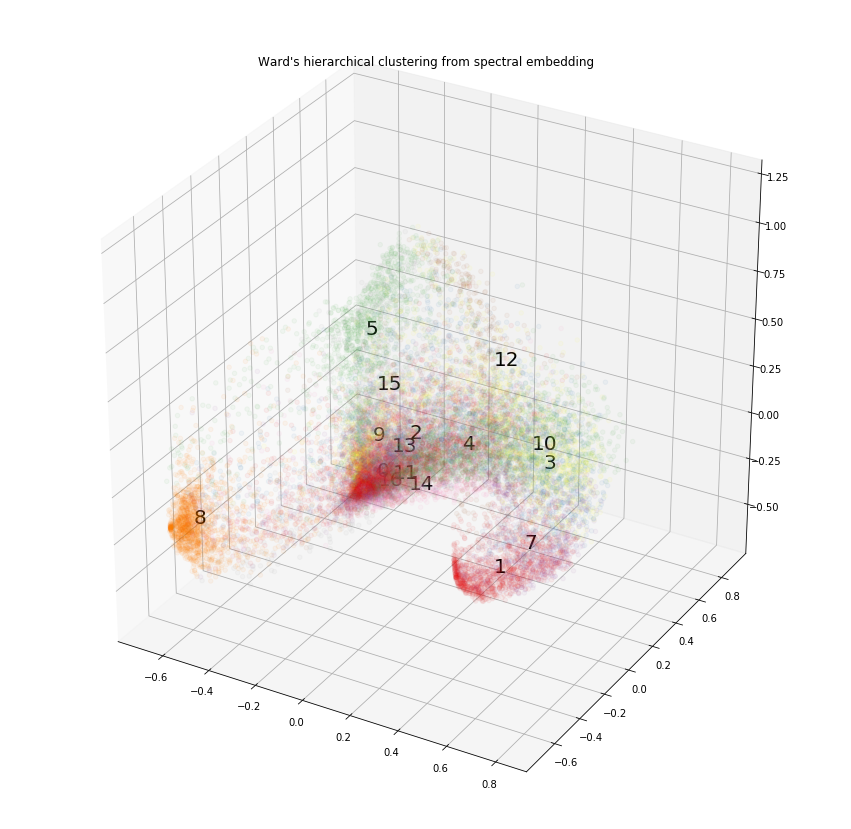

In [128]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=label, 
           alpha=0.05,
           cmap=plt.cm.Set1)

# ax.scatter(xs=centroides_median[:,0],
#            ys=centroides_median[:,1],
#            zs=centroides_median[:,2], 
#            s=500)

for i, txt in enumerate(list(set(author_data.cluster))):
    ax.text(centroides_median[i,0],
            centroides_median[i,1],
            centroides_median[i,2],
            '%s' % (str(txt)), size=20, zorder=1, color='k')

plt.title("Ward's hierarchical clustering from spectral embedding" )


print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
print("Saving Movie File")
rot_animation.save('cluster_anim_4b.mp4', writer=writer)
print("Saving animated GIF File")
rot_animation.save('whljgr_clustering_4b.gif', dpi=80, writer='imagemagick')

# Wordclouds

In [129]:
# tfidf_data=pd.read_csv("tfidf_data_auth_416.csv",header=0,index_col="id")#("usr_txt_ftr_3.csv",header=0,index_col="id")
# del tfidf_data['Unnamed: 0']
tfidf_data.sample(20)
tfidf_data.shape

(18981, 500)

In [130]:
author_tfidf=tfidf_data#pd.read_csv("usr_txt_ftr_3.csv",header=0,index_col="id")
# del author_tfidf['don']
# del author_tfidf['just']
print(author_tfidf.shape)
author_tfidf.sample(20)

(18981, 500)


though  school  always  ever  better  myself  let  year  another  \
id                                                                          
3931298       0       6       1     1       0       1    0     0        1   
3880631       2       7       3     0       3       1    2     5        3   
2942398      44      19      44    23      37      24   38    10       33   
3297995       4       9       7     6       2       4    1     3        1   
3686696       9      18       8    14      19       9   24    15       18   
4274458       9       4       9     3      14       2    6    14       12   
3324571       0       0       0     0       0       0    0     0        0   
4280933       1       0       1     0       0       0    0     0        1   
4199221       0       0       0     2       0       0    0     0        3   
4057857       4       1       3     1       5       6    2     3        7   
3315744       1       0       0     0       0       0    0     0        0   
2661577       0       1       1     0       0       0    0     0        0   
3436973       2       2       0     1       4       0    1     2        2   
3929371       5       6       1     1       2       0    4     8        3   
3554381       1       0       0     0       0       0    0     0        0   
3143116       0       0       2     2       2       0    1     1        2   
3239170       2       0       5     1       1       0    1     0        0   
3471740       0       4       9     6       4       1   10     0        5   
3377949      38      46      55    44      30      22   46    16       14   
4012744       1       0       1     0       1       2    0     1        3   

         many  ...  president  english  cute  longer  internet  dead  rock  \
id             ...                                                           
3931298     0  ...          0        0     0       0         0     0     0   
3880631     6  ...          0        8     0       0         0     0     1   
2942398    19  ...          2        1    28       4         1     0     2   
3297995     2  ...          0        0     1       0         0     0     0   
3686696    19  ...          4        0     1       0         4     1     2   
4274458    38  ...         24        0     1      10        14     1     0   
3324571     0  ...          0        0     0       0         0     1     1   
4280933     0  ...          0        0     0       0         0     0     0   
4199221     1  ...          2        0     0       0         0     0     0   
4057857     2  ...          0        2     0       0         0     0     0   
3315744     0  ...          0        0     0       0         0     0     0   
2661577     0  ...          0        0     0       0         0     0     0   
3436973     7  ...          3        0     0       0        15     0     0   
3929371     4  ...          0        0     0       2         0     1     1   
3554381     5  ...          0        0     0       0         0     0     0   
3143116     4  ...          0        2     0       1         1     5     0   
3239170     1  ...          0        0     0       0         0     0     0   
3471740     3  ...          0        2     0       0         0     0     0   
3377949    27  ...          0        8     0       5         4     2     4   
4012744     0  ...          0        1     3       0         0     0     0   

         special  road  forget  
id                              
3931298        1     0       0  
3880631        1     0       0  
2942398        3     3       6  
3297995        0     0       0  
3686696        2     1       1  
4274458        3     1       2  
3324571        0     0       0  
4280933        0     0       1  
4199221        0     0       0  
4057857        0     0       0  
3315744        0     0       0  
2661577        0     1       0  
3436973        0     0       0  
3929371        2     0       0  
3554381        0     0       0  
3143116        0     0       0  
323

In [131]:
# author_data=pd.read_csv("author_data_clusters_2.csv",header=0,index_col="id")
# print(author_data.shape)
# author_data.sample(20)

In [132]:
clrs_wrdcld=matplotlib.colors.LinearSegmentedColormap.from_list("", [#'#a50026',
                                                                     '#d73027',
                                                                     '#f46d43',
                                                                     '#fdae61',
#                                                                      '#fee090',
#                                                                      '#ffffbf',
#                                                                      '#e0f3f8',
#                                                                      '#abd9e9',
                                                                     '#74add1',
                                                                     '#4575b4',
                                                                     '#313695'])

In [133]:
pic_wide=900
def wrd_cld_dic_clust(clust_labels,clust_id,top_n=300):
    txt_freqs= author_tfidf[clust_labels==clust_id].sum(axis=0)
    indices = np.argsort(txt_freqs)[::-1]
    features =list(author_tfidf.columns)
    top_features = [[features[i],txt_freqs[i]] for i in indices[:top_n]]
    fr_dic={ str(features[i]).upper():txt_freqs[i] for i in indices[:top_n]}
    wc = WordCloud(width=pic_wide,  height=int(pic_wide*(9/21)), 
               background_color=None, mode="RGBA",min_font_size=8,
               colormap=clrs_wrdcld)#Dark2_r)#Paired_r)#tab10_r)#Set1_r) #
    wc.generate_from_frequencies(fr_dic)
    return wc

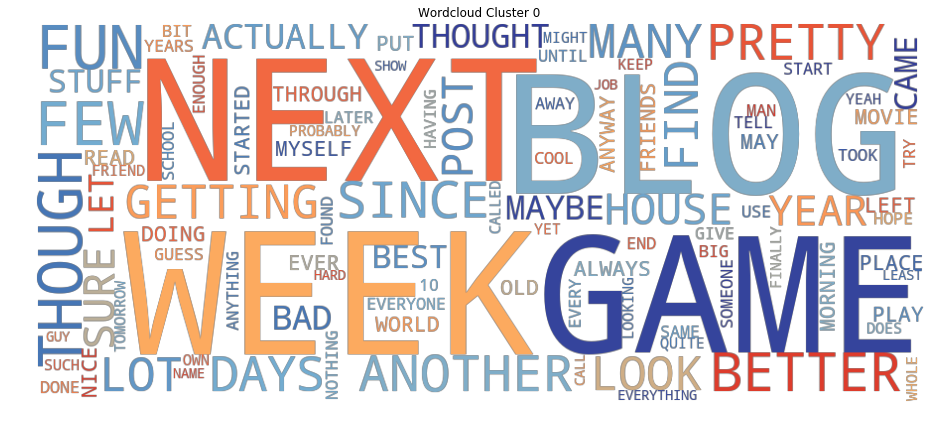

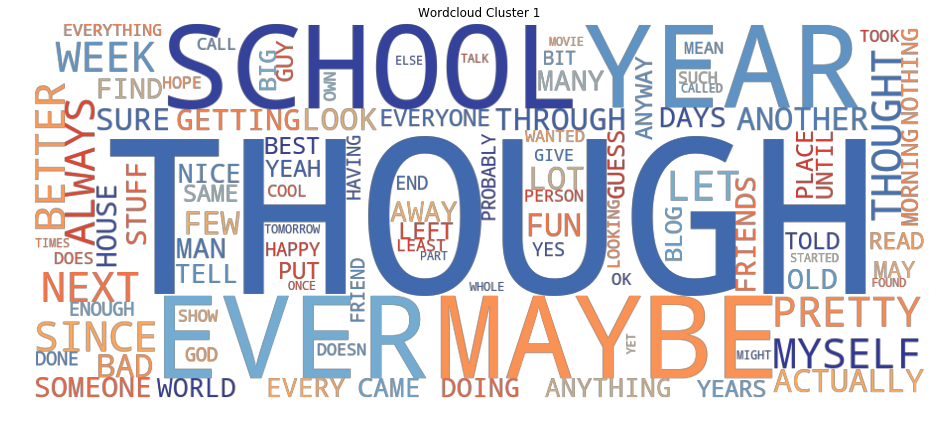

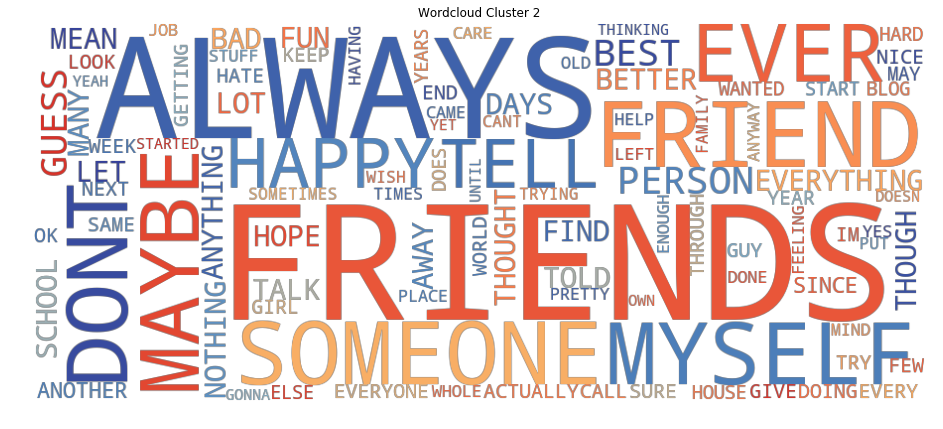

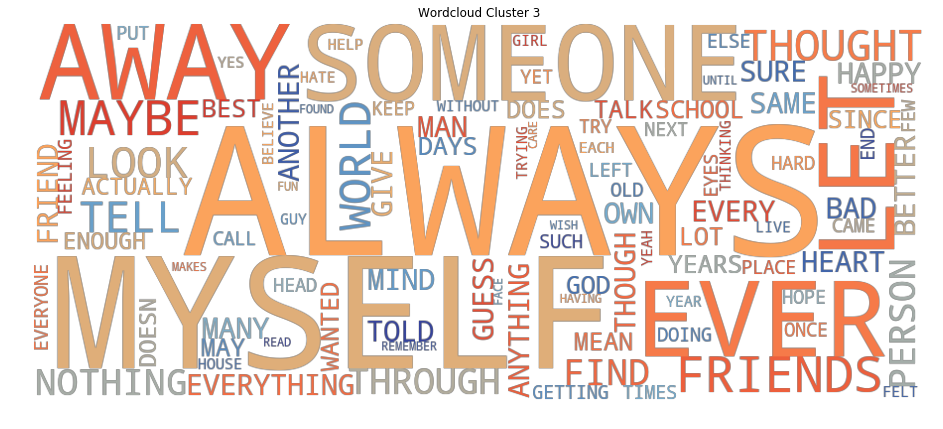

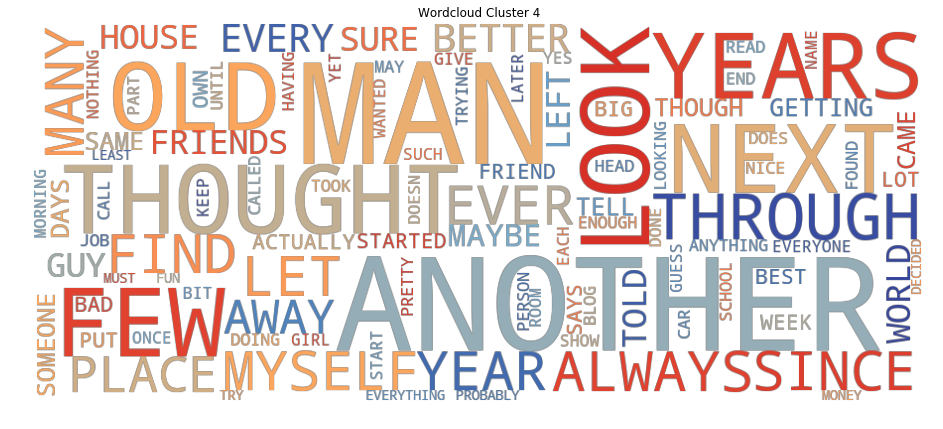

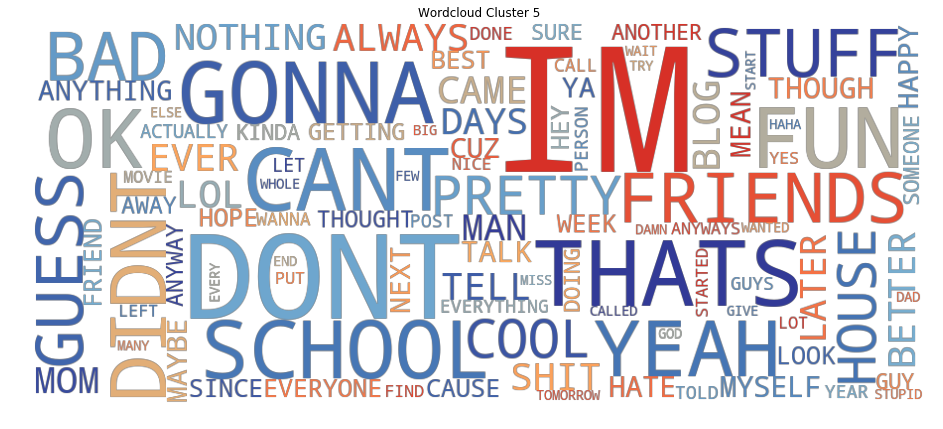

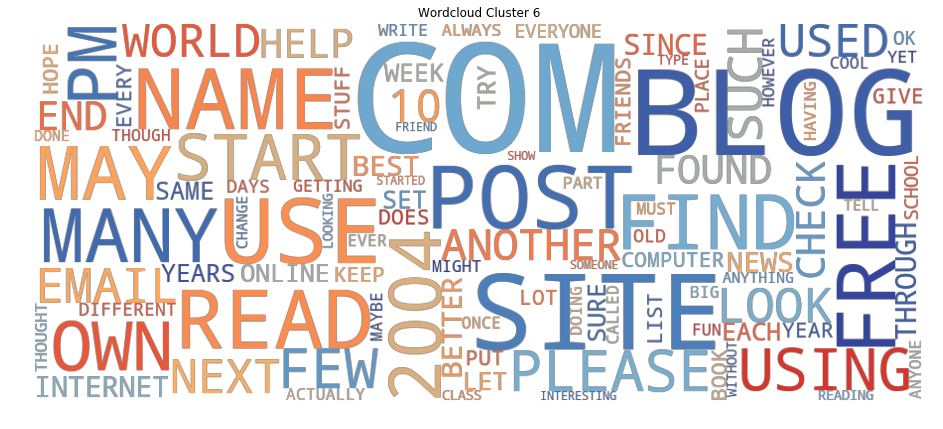

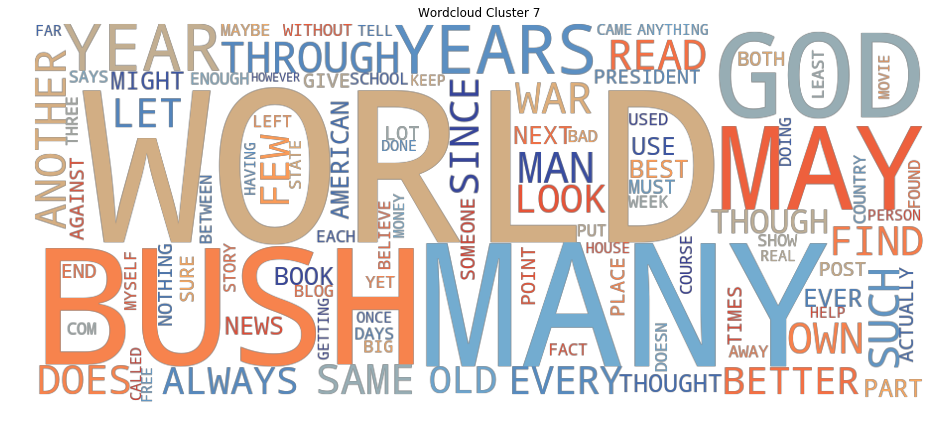

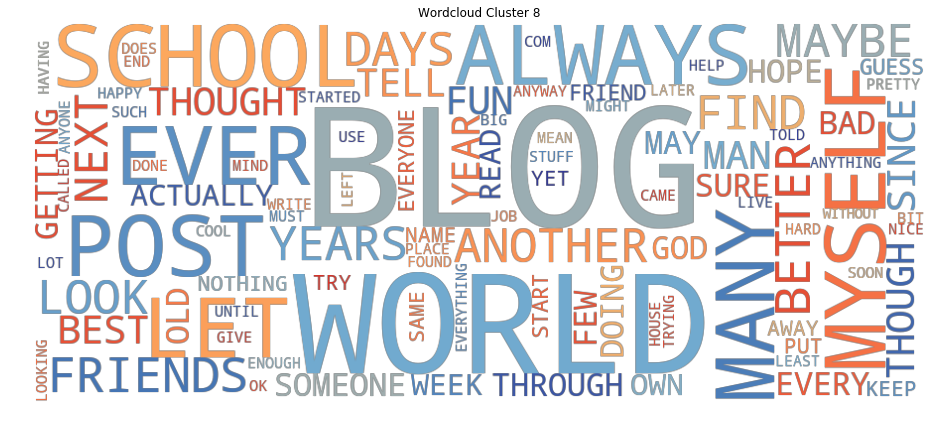

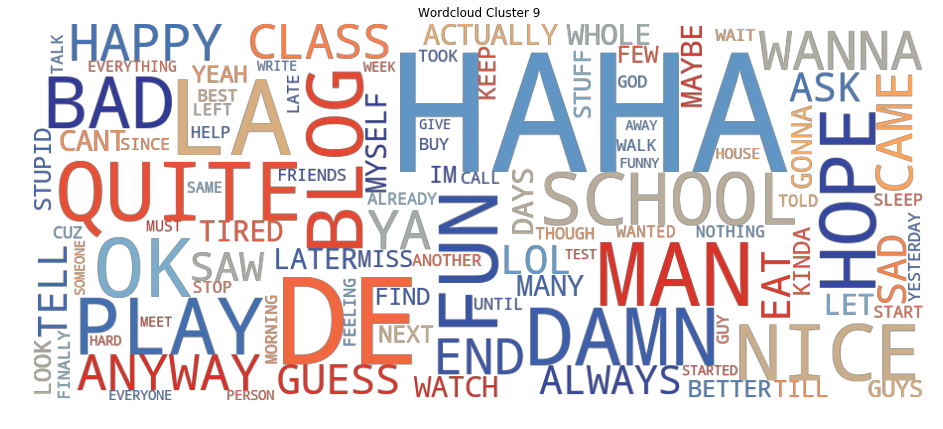

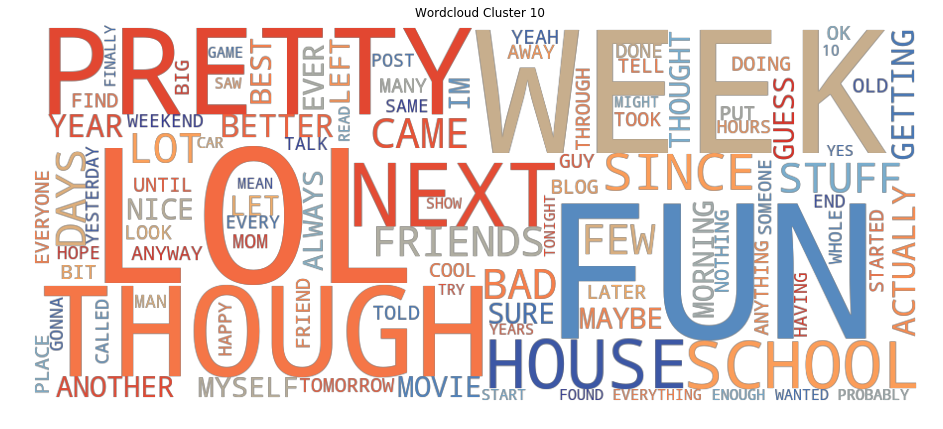

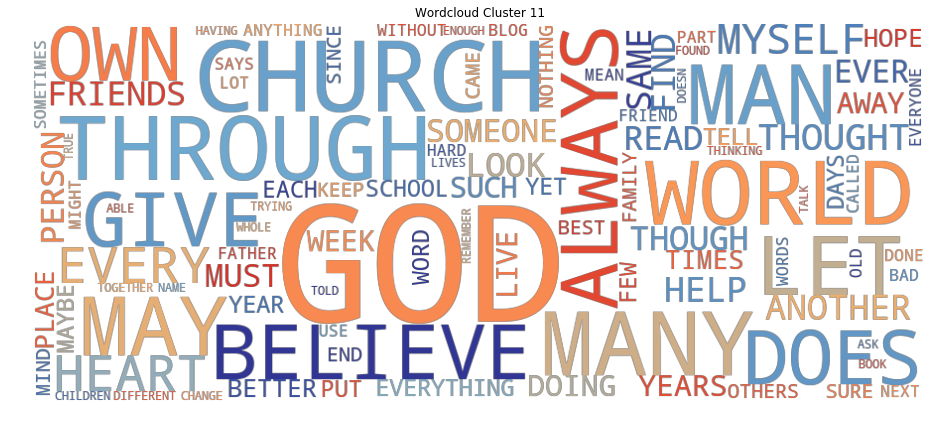

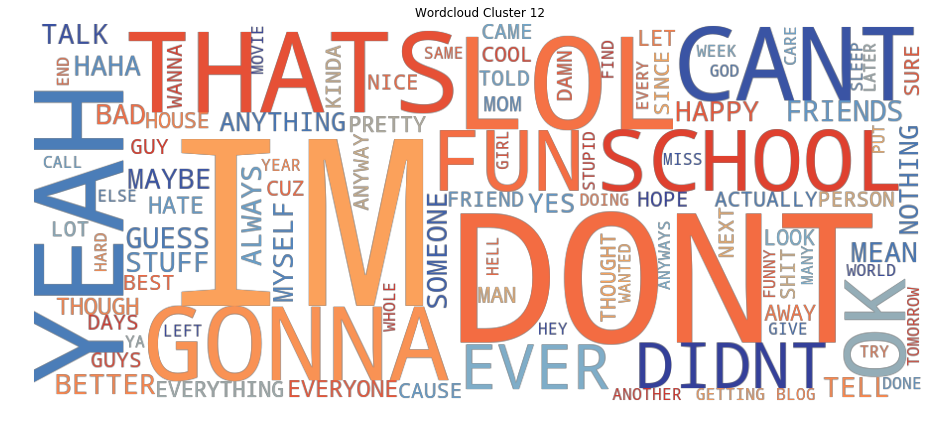

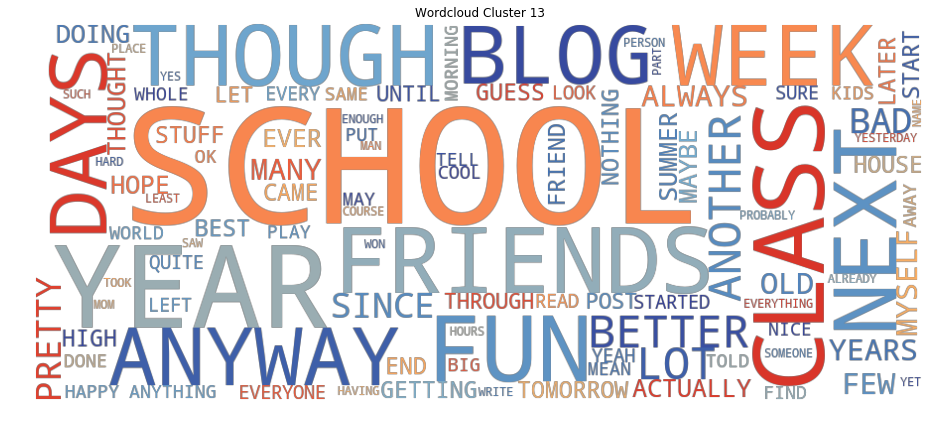

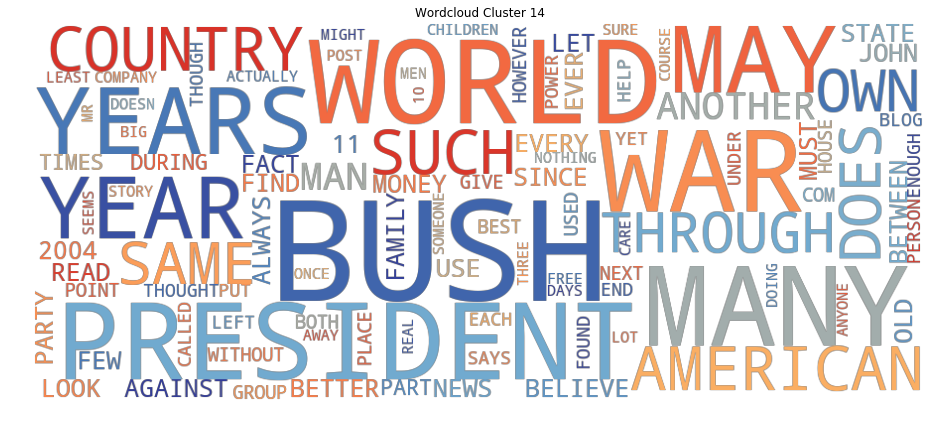

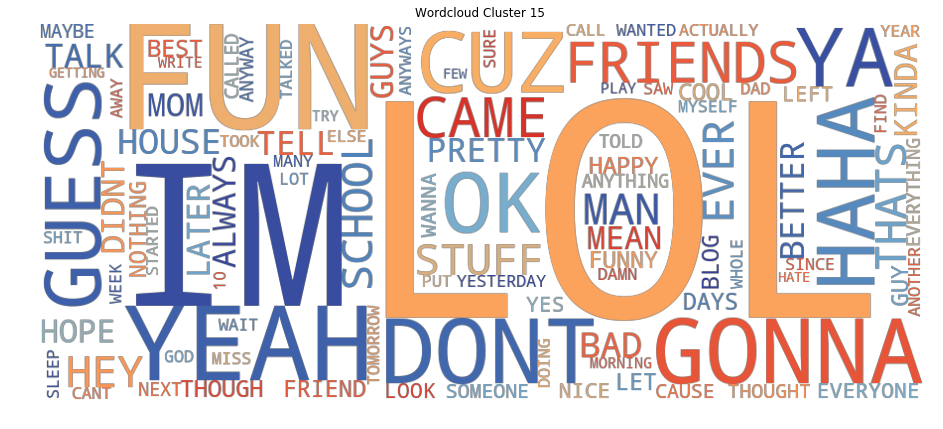

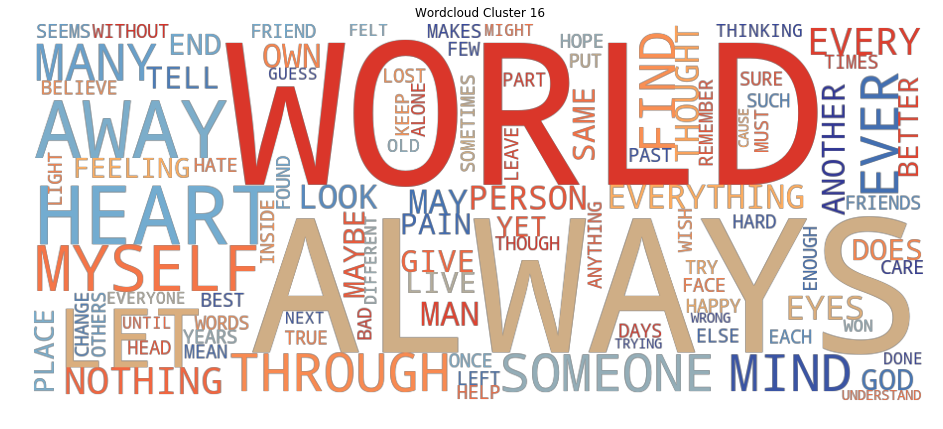

In [139]:
for i, txt in enumerate(list(set(author_data.cluster))):
    plt.figure(figsize=(16,9))
    plt.imshow(wrd_cld_dic_clust(author_data.cluster,i,100), interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud Cluster "+ str(i))


## Significative frequent word by cluster

In [140]:
freq_words_clust=((author_tfidf>0)*1).groupby(author_data.cluster).sum().T
freq_words_clust_prop=freq_words_clust.divide(np.array(pd.crosstab(index=label, columns="count").T),axis=1)
freq_words_clust_prop=freq_words_clust_prop.divide(freq_words_clust_prop.sum(axis=1),axis=0)

In [145]:
most_freq=[]
for i, txt in enumerate(list(set(author_data.cluster))):
    txt_freqs= author_tfidf[author_data.cluster==i].sum(axis=0)
    indices = np.argsort(txt_freqs)[::-1]
    features =list(author_tfidf.columns)
    top_features = [[features[i],txt_freqs[i]] for i in indices[:10]]
    most_freq.append(top_features)
    print("cluster",i)
    print(np.array(top_features))


cluster 0
[['week' '5708']
 ['next' '5633']
 ['blog' '5603']
 ['game' '5573']
 ['fun' '5344']
 ['few' '5216']
 ['though' '5196']
 ['better' '5156']
 ['since' '5153']
 ['another' '5141']]
cluster 1
[['though' '49928']
 ['school' '46061']
 ['ever' '44722']
 ['maybe' '44652']
 ['year' '44616']
 ['myself' '44482']
 ['since' '44337']
 ['better' '44323']
 ['week' '44103']
 ['next' '43731']]
cluster 2
[['friends' '6121']
 ['always' '4522']
 ['friend' '4399']
 ['someone' '4029']
 ['myself' '3928']
 ['dont' '3881']
 ['maybe' '3580']
 ['ever' '3444']
 ['happy' '3326']
 ['tell' '3293']]
cluster 3
[['always' '9587']
 ['myself' '9568']
 ['someone' '7868']
 ['ever' '7765']
 ['away' '7728']
 ['let' '7688']
 ['friends' '7314']
 ['maybe' '7073']
 ['thought' '7030']
 ['look' '6873']]
cluster 4
[['man' '6563']
 ['another' '5558']
 ['thought' '5545']
 ['next' '5496']
 ['look' '5487']
 ['few' '5454']
 ['old' '5387']
 ['years' '5279']
 ['through' '5277']
 ['always' '5210']]
cluster 5
[['im' '15151']
 ['dont